## How large can the Haney Number get in MPAS-Ocean before crashing the model?

Author: McKenzie Larson

In [1]:
## import modules
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
import numpy as np

matplotlib.rcParams.update({'font.size': 16})

In [2]:
## Specify the directories and what is being tested
changes = '0.0'

## set directories
parent_dir = '/pscratch/sd/m/mlarson/changeHaney_nonlinear/'
sim_dir = 'toposm_' + changes

## open data
ds_haney = xr.open_dataset(parent_dir+sim_dir+'/ocean/isomip_plus/planar/2km/z-star/Ocean0/viz/haney.nc')


## need to get more cell info
ds_output = xr.open_dataset(parent_dir+sim_dir+'/ocean/isomip_plus/planar/2km/z-star/Ocean0/simulation/output.nc')

In [3]:
print('Maximum Haney Value for',sim_dir,'\n',ds_haney.haneyCell.max().values)

Maximum Haney Value for toposm_0.0 
 165.27567134655683


In [12]:
ds_output.ssh.values

array([[0.12643719, 0.12601835, 0.12556769, ..., 0.12269684, 0.11777974,
        0.11939073]])

In [13]:
## find which indices are along the same y value
larger_same_y_idx = []
same_y_idx = []
y_val_start = ds_output.yCell[0]
for i in range(len(ds_output.xCell)):
    y_val = ds_output.yCell[i]
    if y_val == y_val_start:
        same_y_idx.append(i)
    else:
        larger_same_y_idx.append(same_y_idx)
        same_y_idx = []
        same_y_idx.append(i)
        y_val_start = y_val

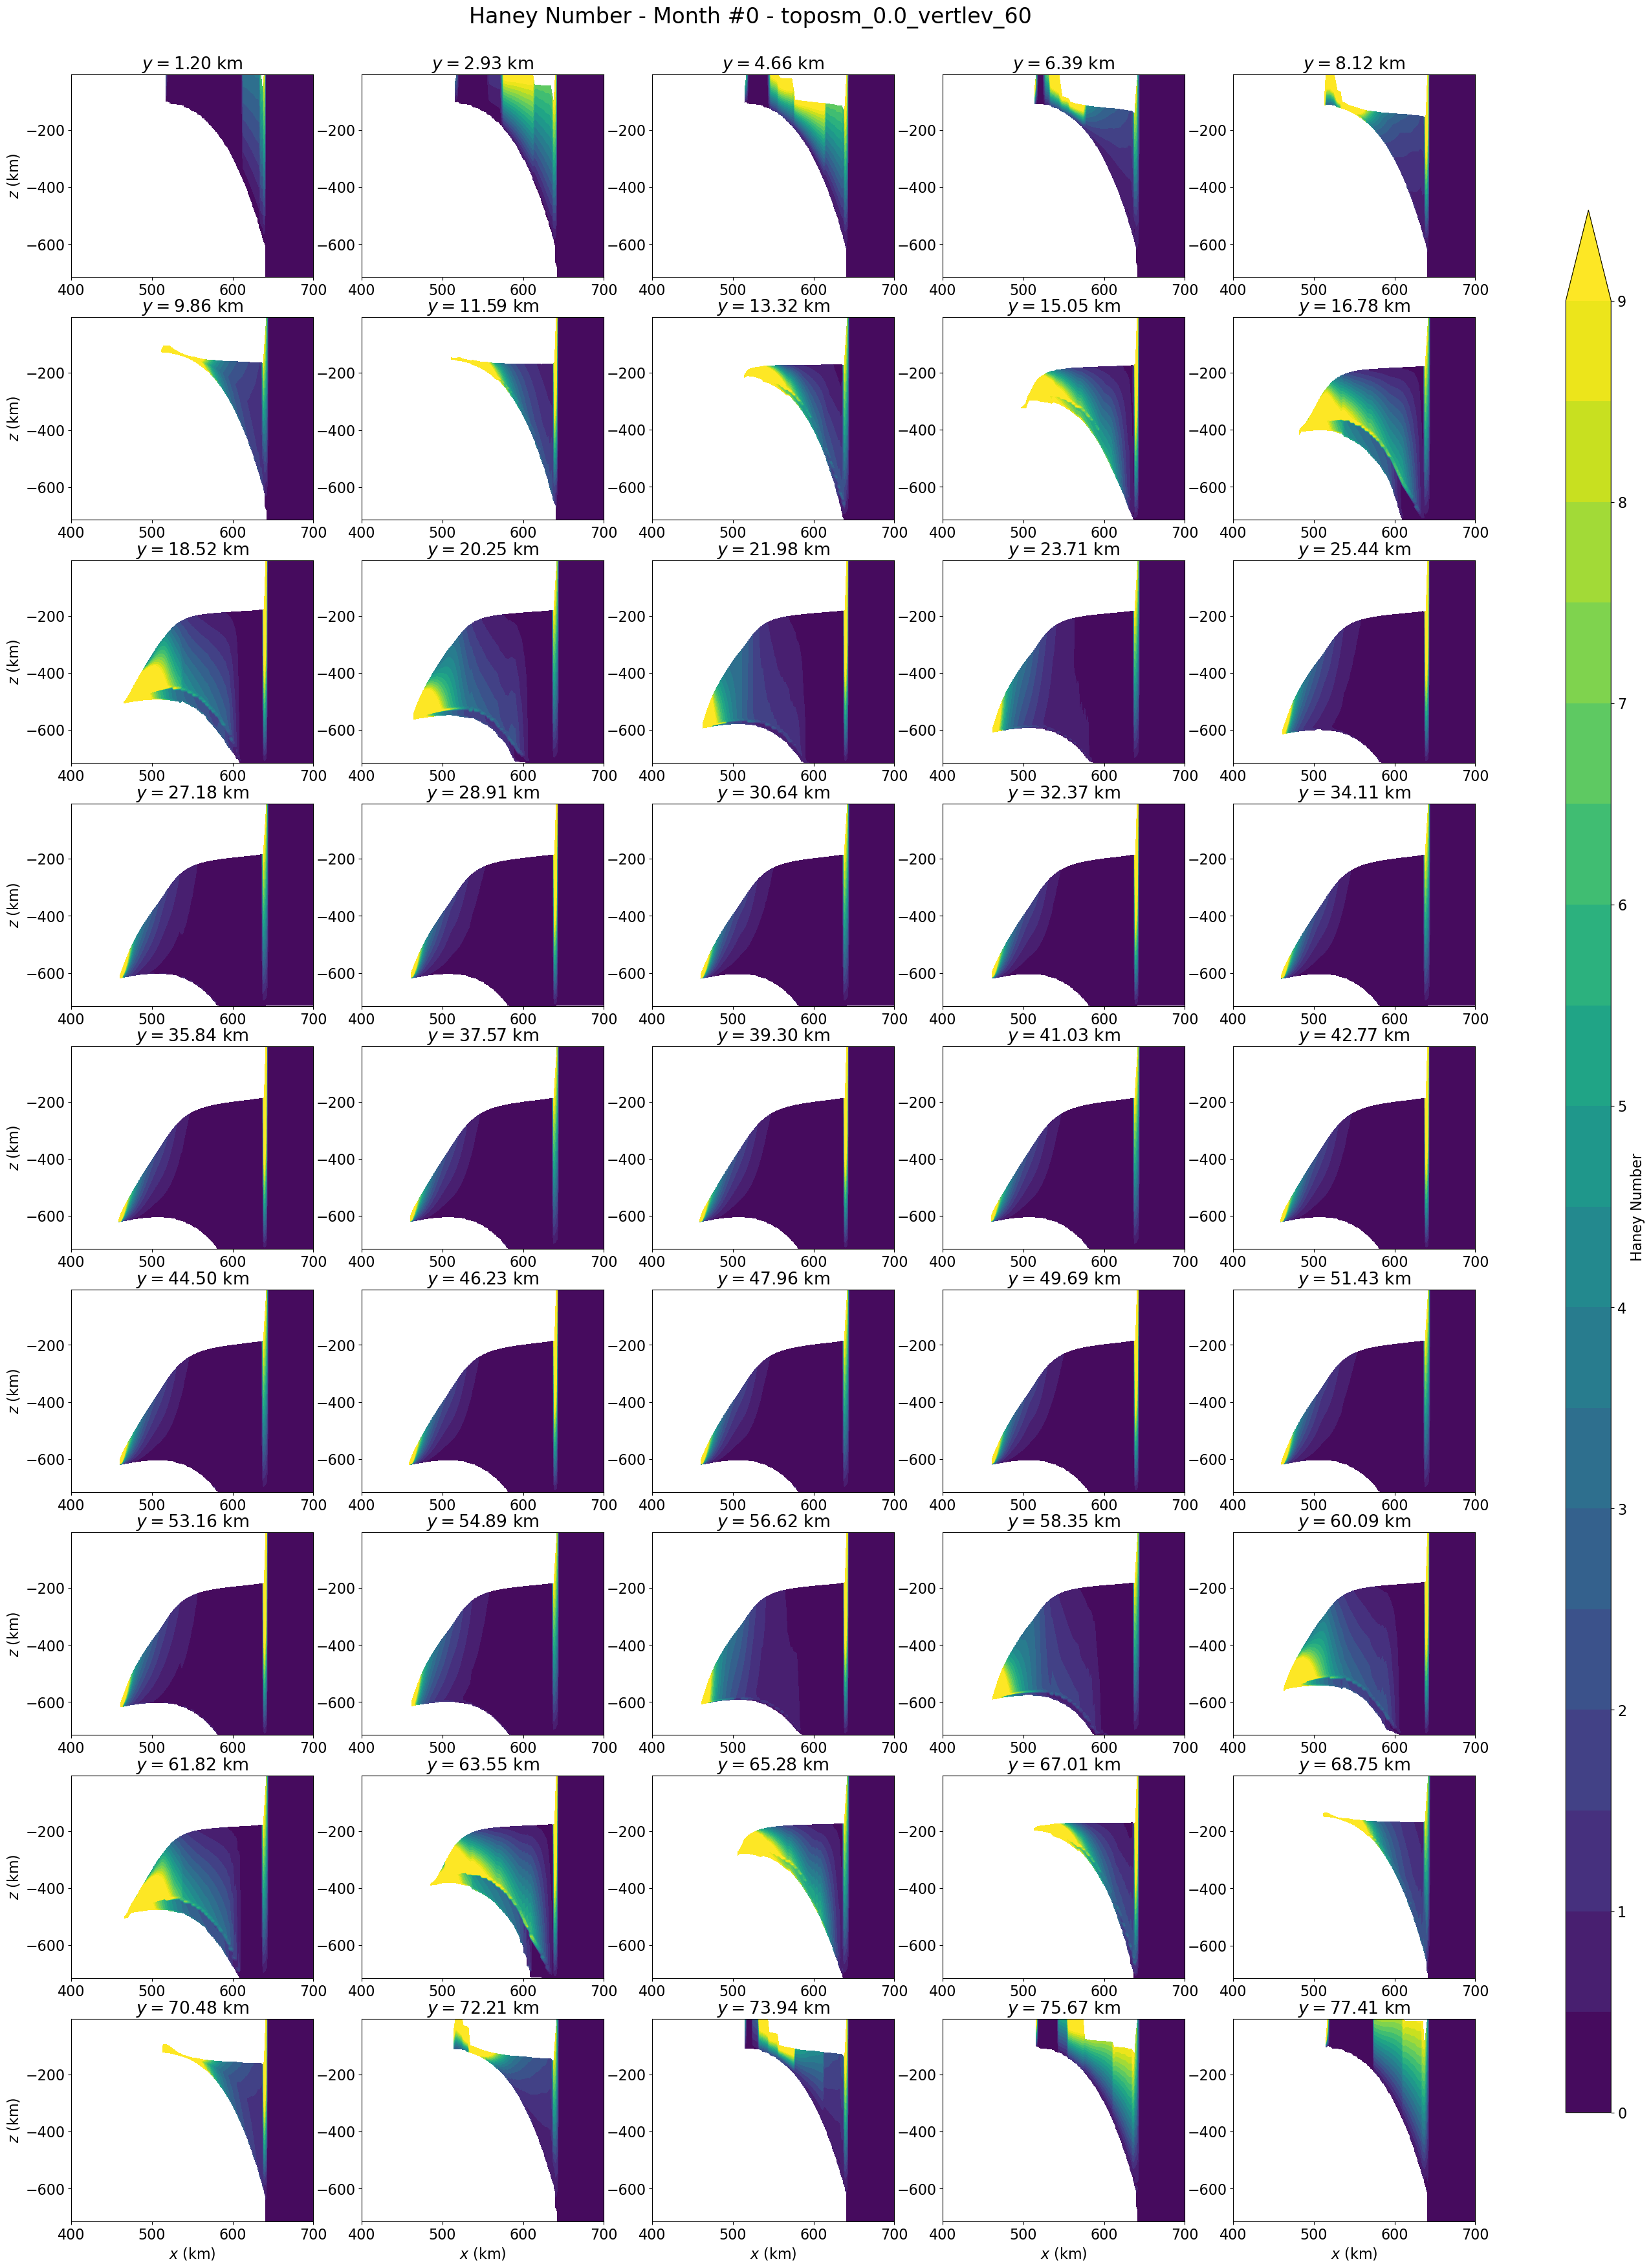

In [5]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(9,5, figsize=(28,42))

y_idx = 0
for r in np.arange(0,9,1):
    for c in np.arange(0,5,1):
        # Make the grid
        reshaped_xCell = [ds_output.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(0,9.5,0.5)
        im = ax[r,c].contourf(reshaped_xCell/1000.,ds_output.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_haney.haneyCell.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         levels=levs,cmap="viridis",alpha=1,extend='max')

        ax[r,c].set_title(r'$y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km')
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400,xmax=700)
        
        y_idx+=1

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Haney Number')
fig.suptitle('Haney Number - Month #'+str(midx)+' - '+sim_dir, size=24, ha='center', x = 0.5, y = 0.925)
plt.show()

In [5]:
h2 = ds_haney.haneyCell

In [9]:
h1 = ds_haney.haneyCell

In [19]:
h0 = ds_haney.haneyCell

In [30]:
h0d0_5 = ds_haney.haneyCell

In [42]:
h0_vl48 = ds_haney.haneyCell

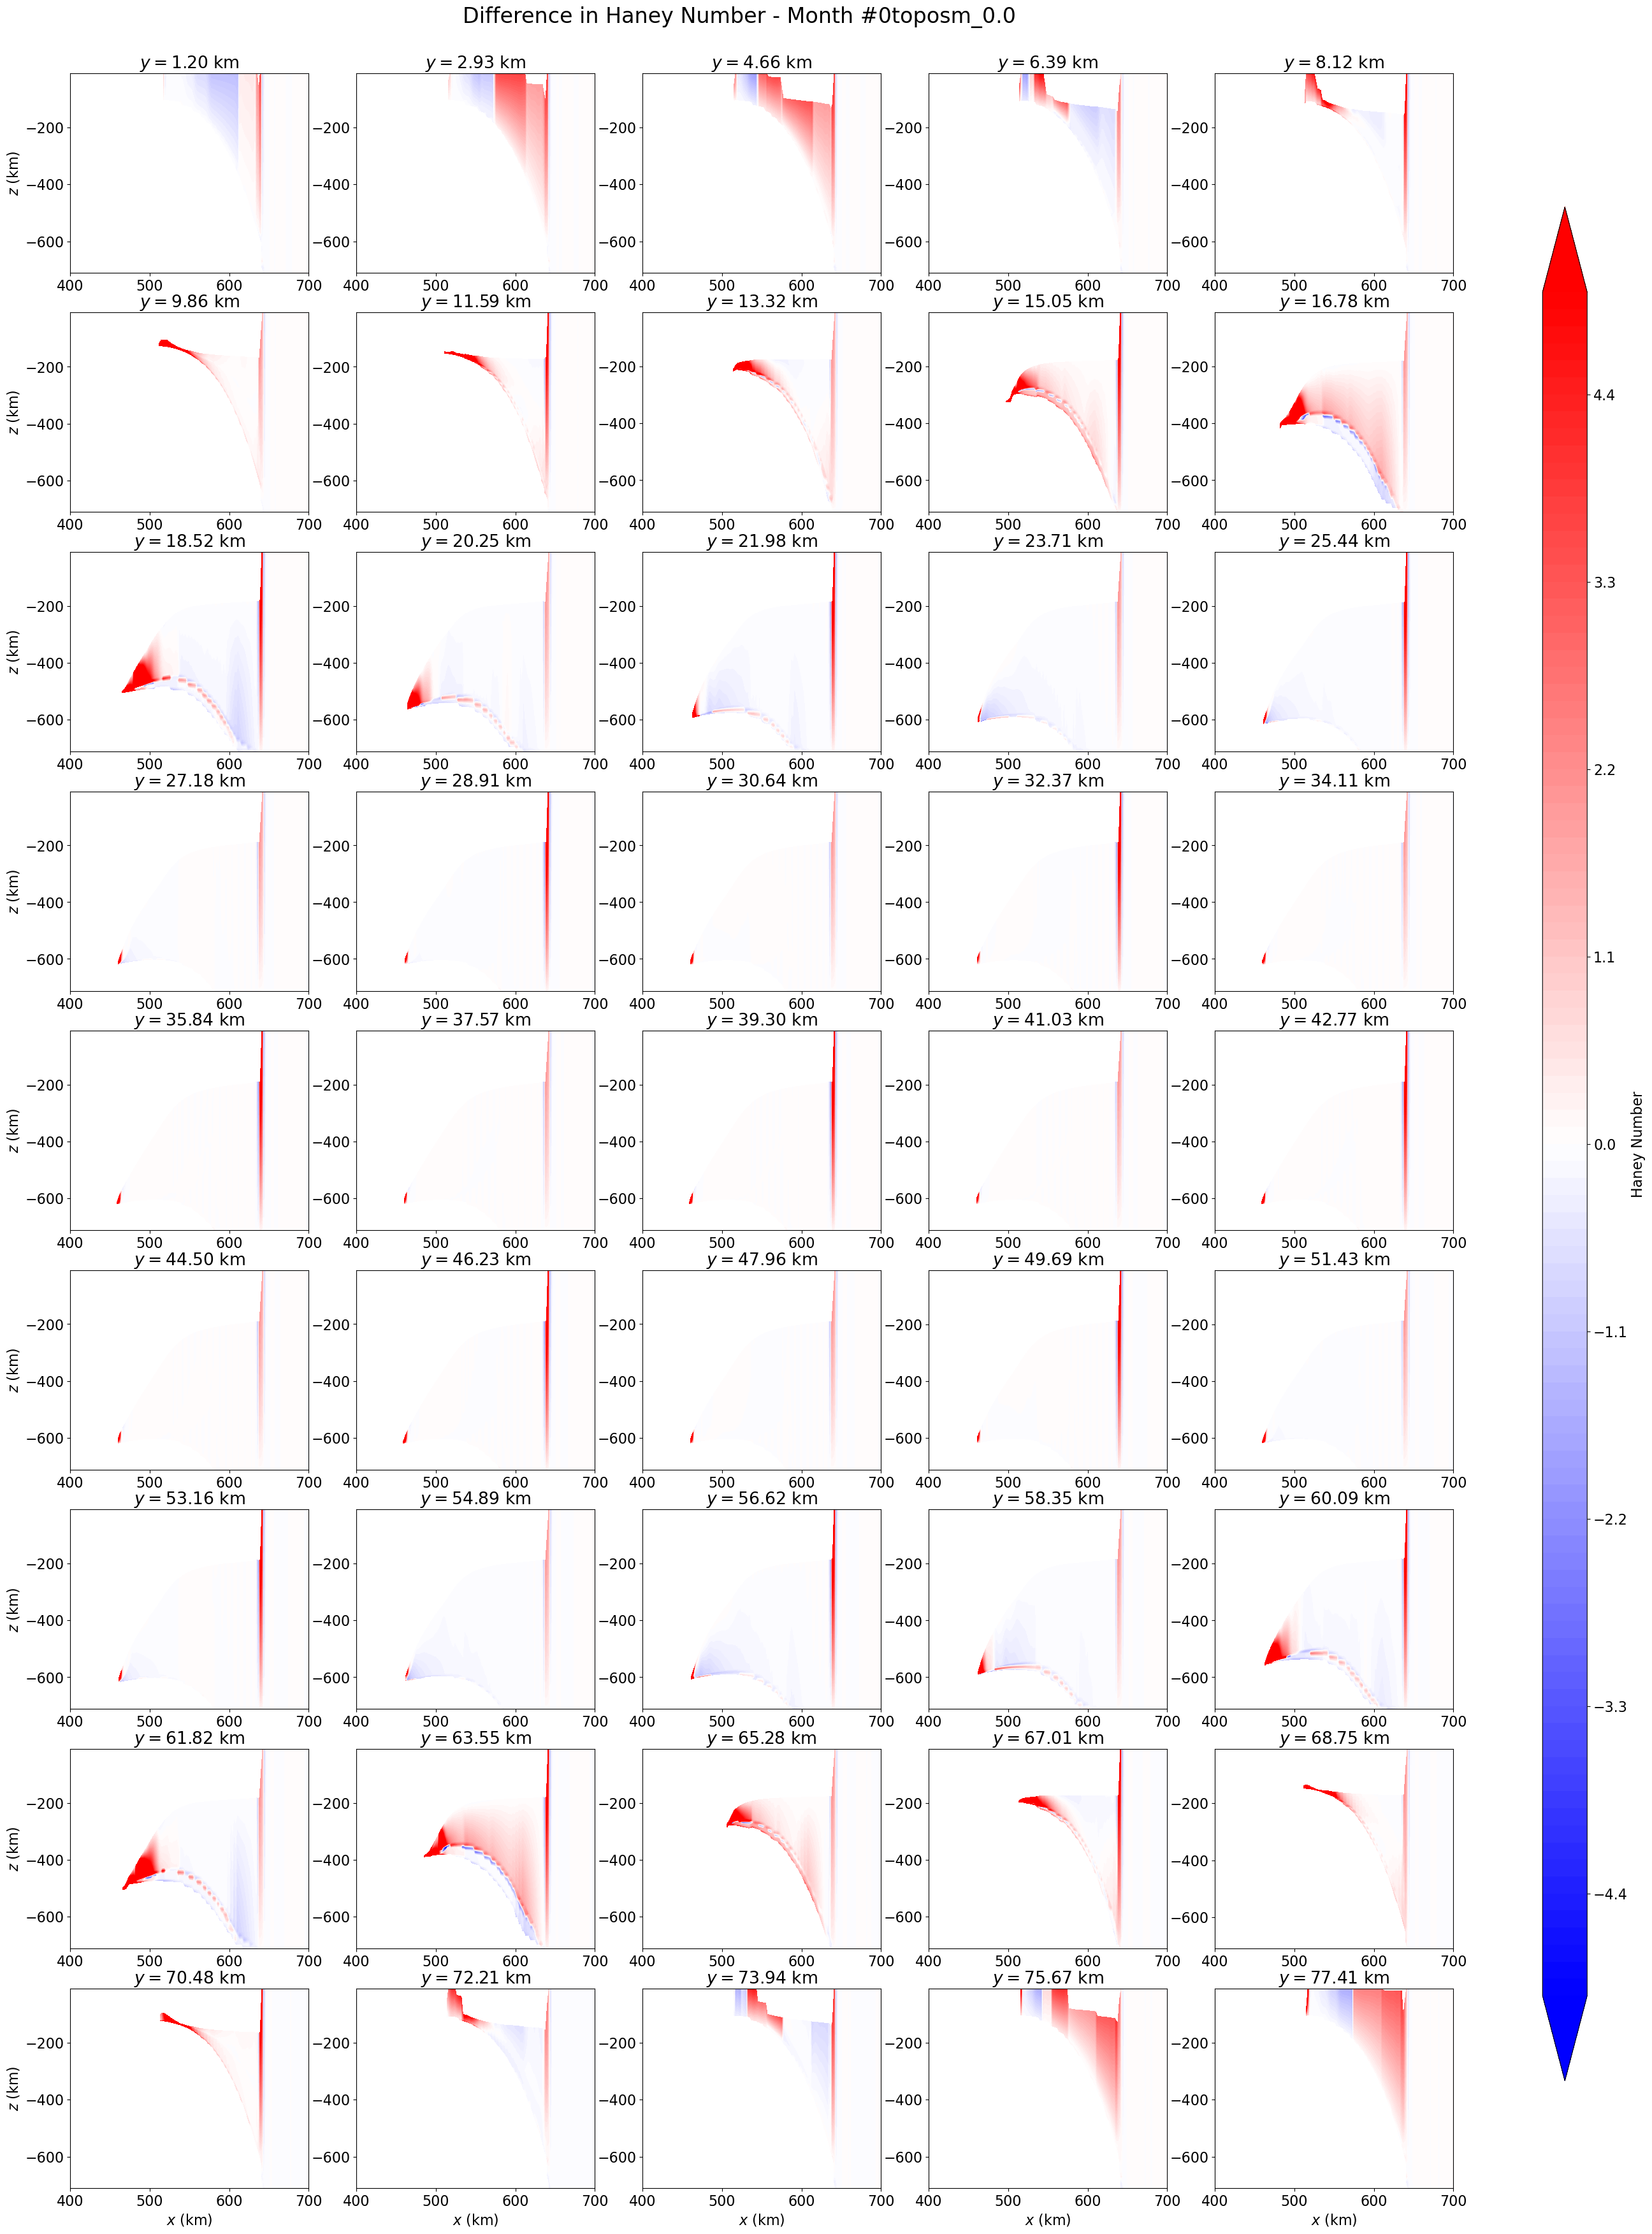

In [20]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(9,5, figsize=(28,42))

cvals  = [-2., 0, 2]
colors = ["blue","white","red"]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

y_idx = 0
for r in np.arange(0,9,1):
    for c in np.arange(0,5,1):
        # Make the grid
        reshaped_xCell = [ds_output.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,5.1,0.1)
        im = ax[r,c].contourf(reshaped_xCell/1000.,ds_output.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),
                              h0.isel(Time=midx,nCells=larger_same_y_idx[y_idx])-h1.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         levels=levs,cmap=cmap,alpha=1,extend='both')

        ax[r,c].set_title(r'$y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km')
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400,xmax=700)
        
        y_idx+=1

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Haney Number')
fig.suptitle('Difference in Haney Number - Month #'+str(midx)+sim_dir, size=24, ha='center', x = 0.5, y = 0.925)
plt.show()

In [13]:
## calculate the maximum haney value in the entire simulation (whole domain)
ds_haney.haneyCell.max()

<xarray.DataArray 'haneyCell' ()> Size: 8B
array(33.13022183)

In [44]:
print(h2.max().values)
print(h1.max().values)
print(h0.max().values)
print(h0d0_5.max().values)
print(h0_vl48.max().values)

12.517987859402071
33.130221825115875
165.17324728291135
4.835087729695087
210.15038665277342


In [26]:
ds_haney.haneyCell.isel(Time=0).max().values

array(165.17324728)

In [36]:
xr.open_dataset('/pscratch/sd/m/mlarson/changeHaney/toposm_0.0_draftsc_1.5/ocean/isomip_plus/planar/2km/z-star/Ocean0/ssh_adjustment/adjusting_init.nc').ssh[50:150].values

array([], shape=(0, 7319), dtype=float64)